# ML Task 2.3 - Random Forests - Part 2 - 6 stations

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Data preprocessing for Belgrade weather station

#### 03. Split data into training and testing sets

#### 04. Initialize and train the RF model

#### 05. Predict and evaluate

#### 06. Debilt weather station: repeat sequence

#### 07. Maastricht weather station: repeat sequence

#### 08. Madrid weather station: repeat sequence

#### 09. Heathrow weather station: repeat sequence

#### 10. Stockholm weather station: repeat sequence

#### 11. Summary and interpretation

### 01. Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [3]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets\Unsupervised'

In [5]:
# Import unscaled weather dataset and Pleasant Weather answers dataset, respectively, without the index column
df_unscaled = pd.read_excel(os.path.join(path, 'weather_data_unscaled_task_2.3.xlsx'), index_col=None)
pleas_ans = pd.read_excel(os.path.join(path, 'answers_pleasant_weather.xlsx'), index_col=None)

In [7]:
# Check the dimensions
print(df_unscaled.shape)
print(pleas_ans.shape)

(22950, 137)
(22950, 16)


In [9]:
df_unscaled.head(2)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0 1960-01-01      1                  7            0.85           1.018   
1 1960-01-02      1                  6            0.84           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  

[2 rows x 137 columns]

In [11]:
pleas_ans.head(2)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0 1960-01-01                       0                          0   
1 1960-01-02                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0

### 02. Data preprocessing for Belgrade weather station

#### Comment: this part of Task 2.3 shifts gears by fitting the RF model locally to individual weather stations (rather than the prior global 135 station-features), using the same 9 weather features per station, and using the full temporal 62+ year period (rather than one decade) of data.  Then, calculating more discriminating metrics (balanced accuracy, F1 score (weighted), Recall, Precision) due to the imbalanced class nature of the answers dataset, where some stations have only ~16-25% of daily observations over 62+ years as Pleasant weather days. Also, outputting a confusion matrix, single-example decision tree plot and feature importances calculation and corresponding plot to find the strongest y predictor contributing variables for that individual weather station.

In [16]:
# Extract relevant features and target for a single station
station = 'BELGRADE'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [18]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [24]:
# The extracted subset dataframes were converted (above) to NumPy arrays (format required for RF model input)
# Display first row of unscaled data for the X NumPy array
X[0]

array([ 1.    ,  0.81  ,  1.0195,  0.88  ,  0.    ,  7.    ,  3.7   ,
       -0.9   ,  7.9   ])

In [26]:
# Display the first 3 rows of data for the y answers NumPy array
y[0:3]

array([0, 0, 0], dtype=int64)

### 03. Split data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 04. Initialize and train the RF model

In [37]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 05. Predict and evaluate

In [42]:
# We need more discriminating metrics to evaluate imbalanced class scenarios, is the case for the answers dataset
# Import other metrics that give more clarity on performance against imbalanced class answers
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, \
precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

#### Predict

In [45]:
# Predict
y_pred = clf.predict(X_test)

#### Evaluate

In [49]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for BELGRADE
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


#### Confusion matrix

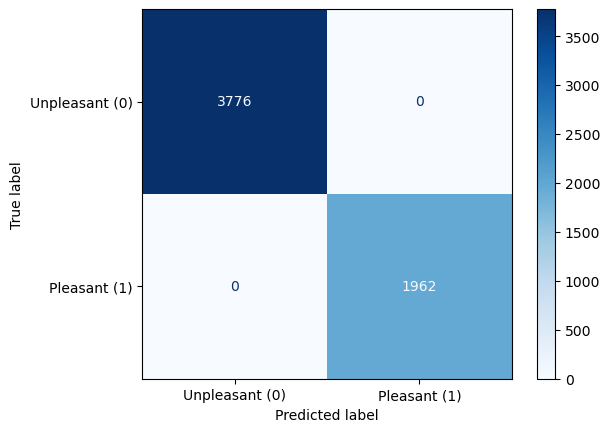

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

#### Plot a single decision tree

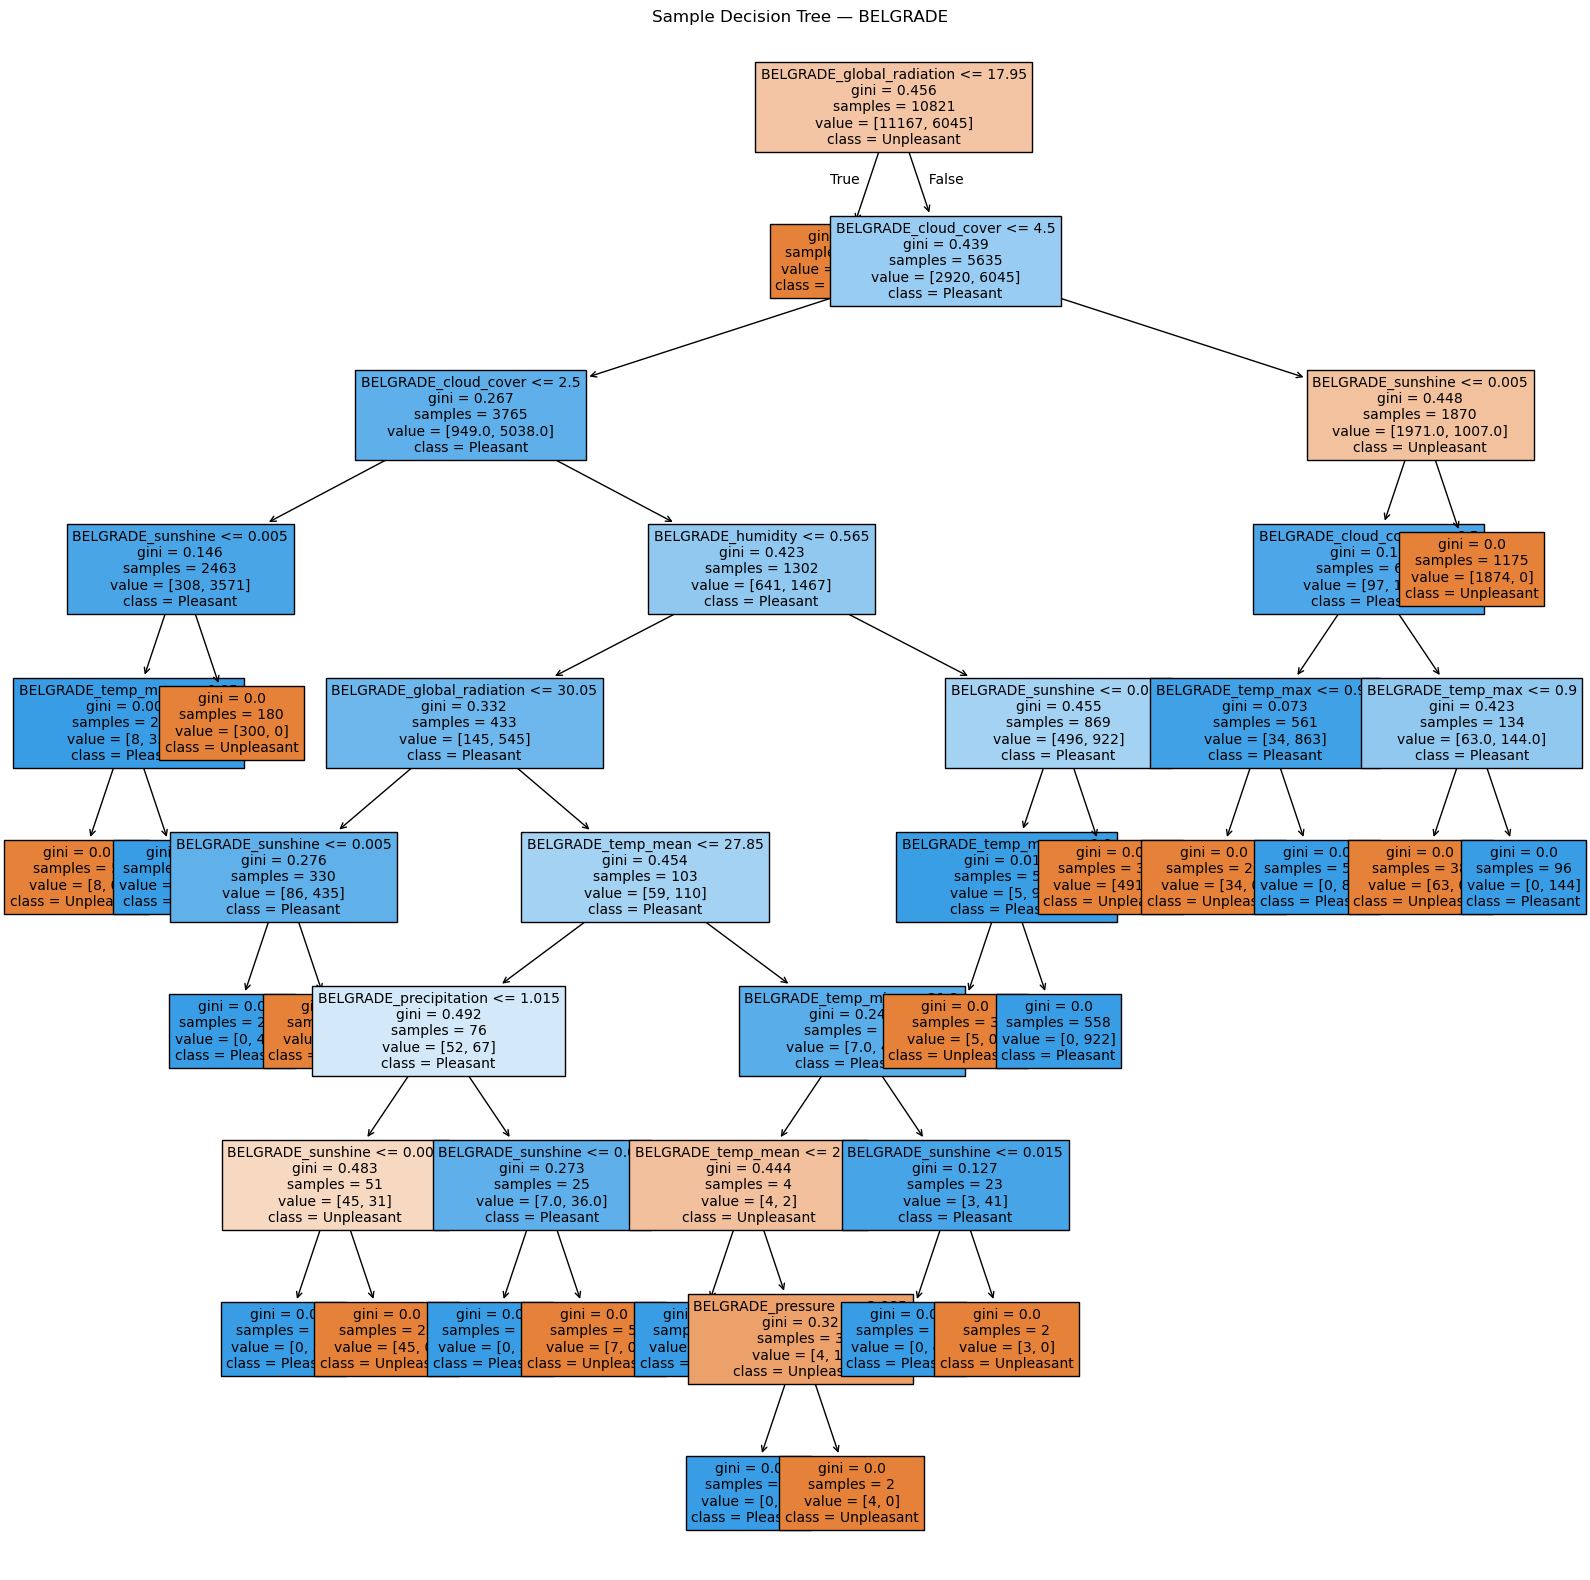

In [59]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

### Plot feature importances

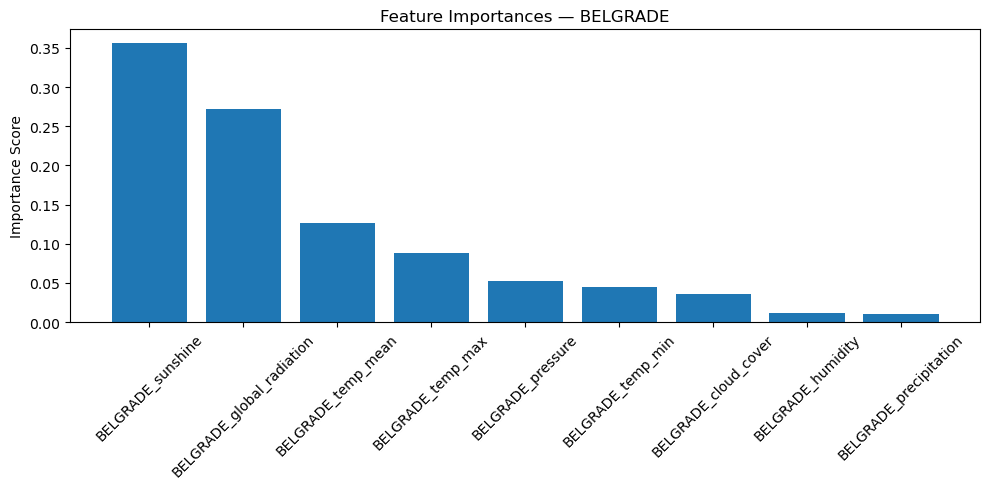

In [62]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

#### Note: the results from this individual station and 5 others will be summarized and interpreted in the separate notebook "ML Task 2.3 - Random Forests - Part 2 - single-station summary"

# 06. Debilt weather station: repeat sequence

In [84]:
# Extract relevant features and target for a single station
station = 'DEBILT'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [87]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [93]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
# Predict
y_pred = clf.predict(X_test)

In [97]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for DEBILT
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


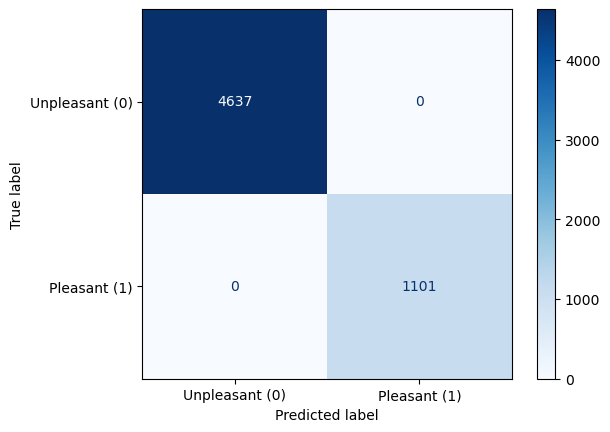

In [99]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

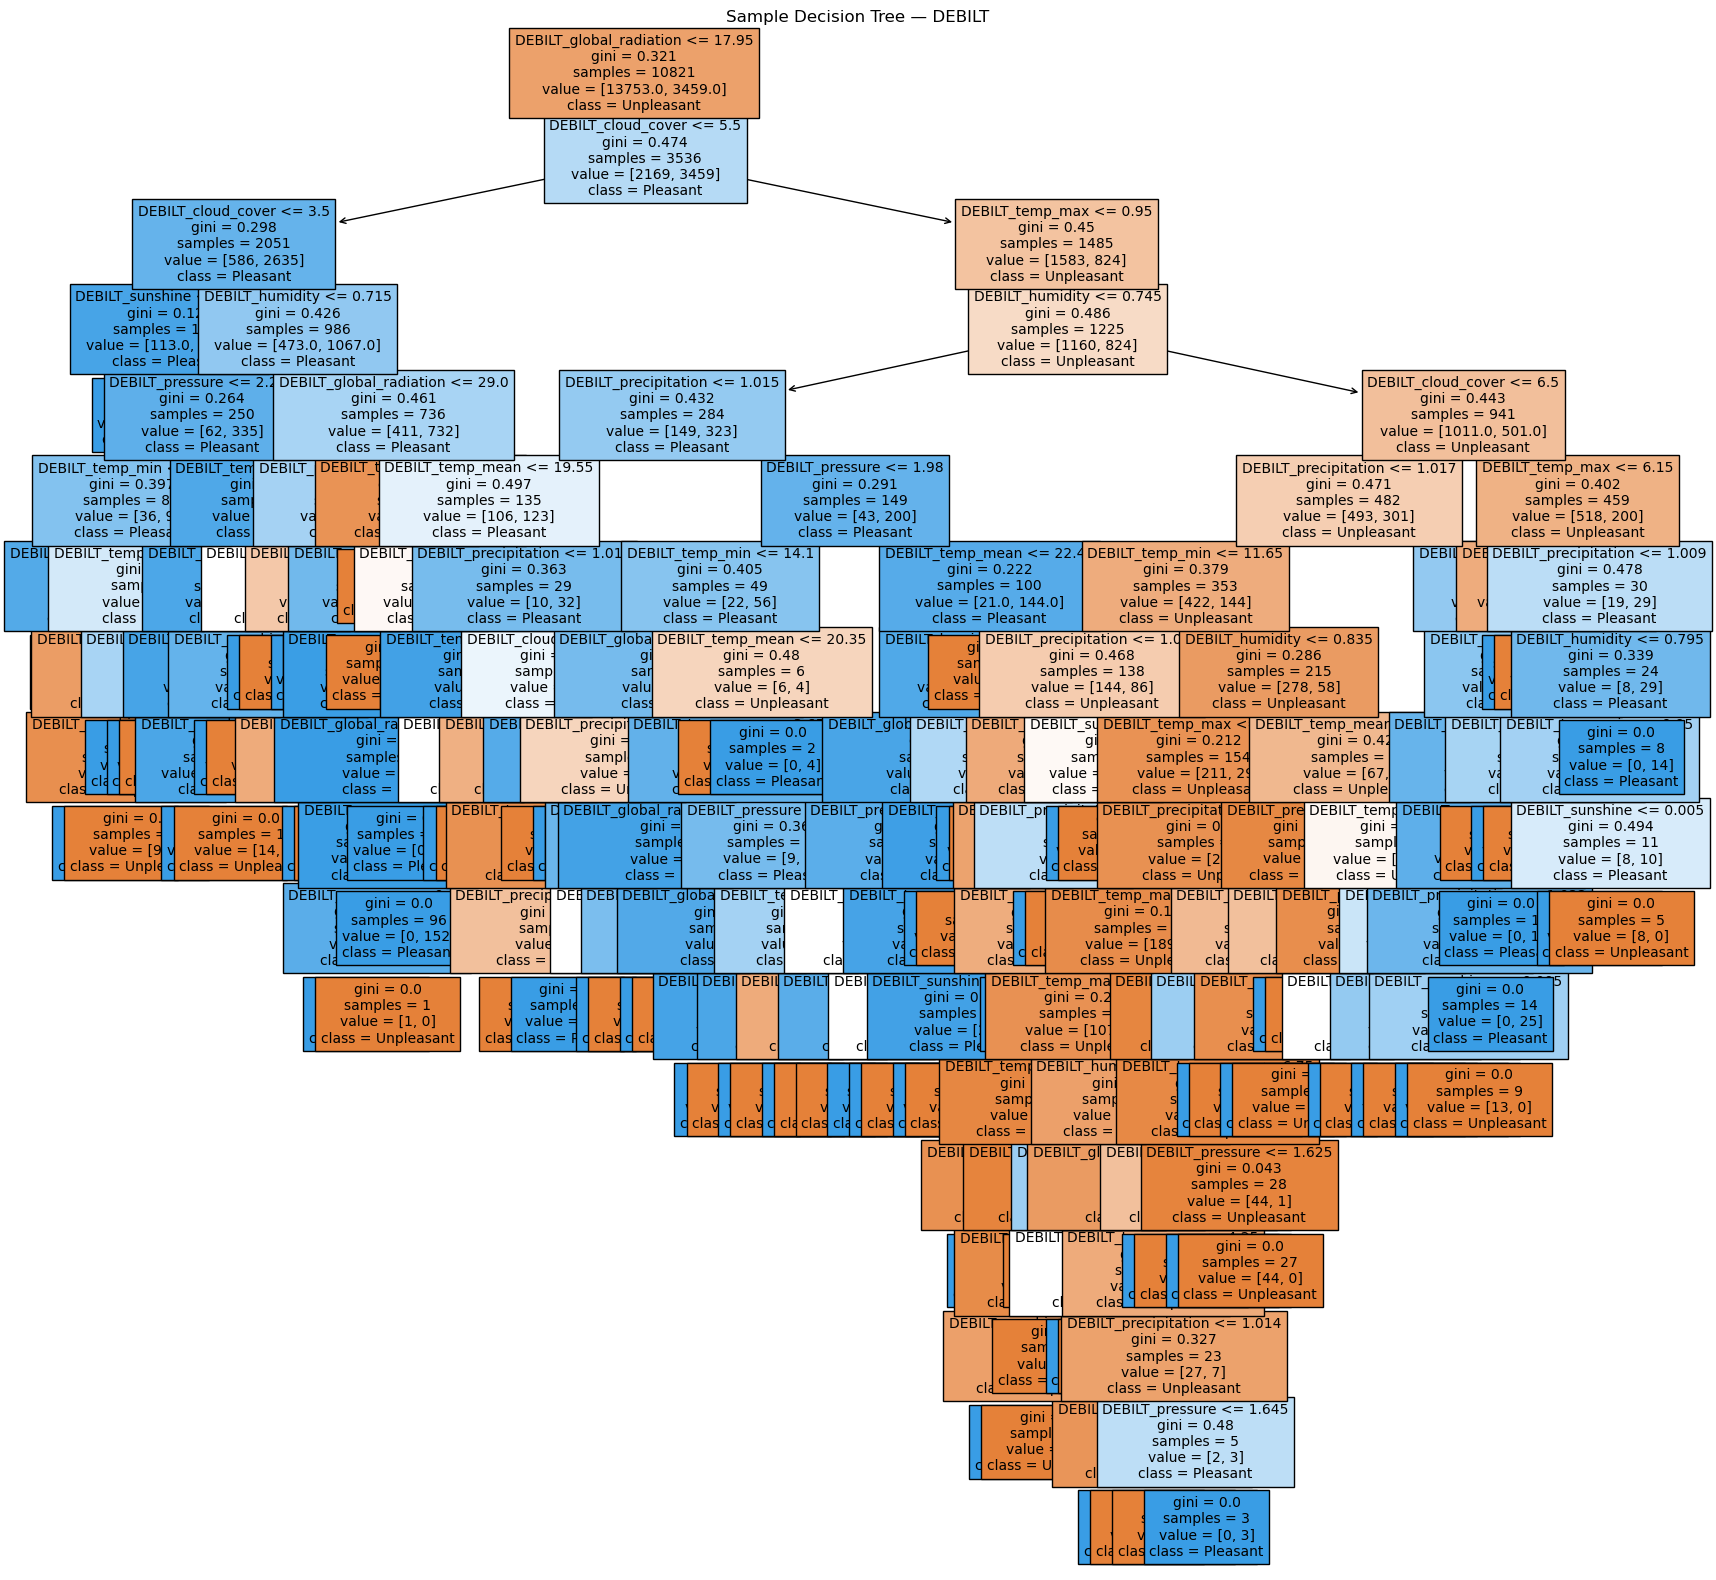

In [101]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

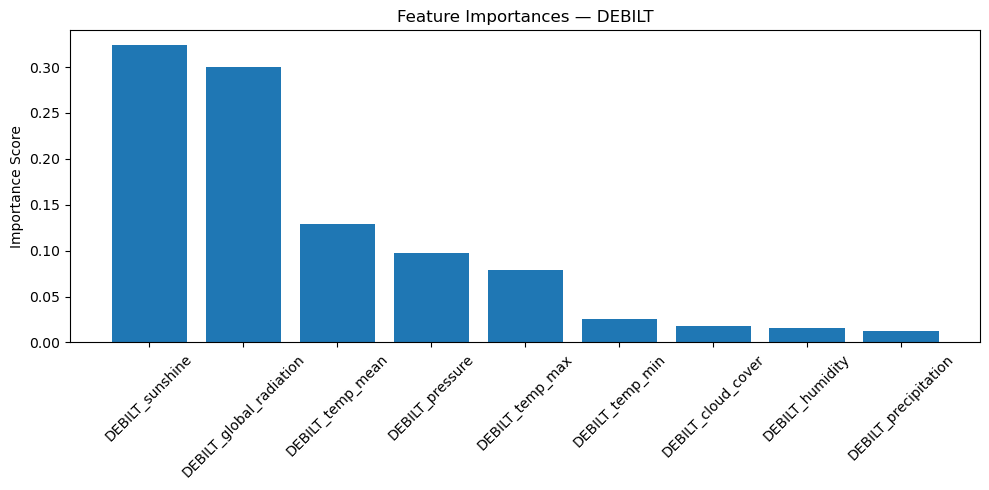

In [103]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

#### Note: the results from this individual station and 5 others will be summarized and interpreted in the separate notebook "ML Task 2.3 - Random Forests - Part 2 - single-station summary"

# 07. Maastricht weather station: repeat sequence

In [110]:
# Extract relevant features and target for a single station
station = 'MAASTRICHT'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [112]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [118]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [120]:
# Predict
y_pred = clf.predict(X_test)

In [122]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for MAASTRICHT
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


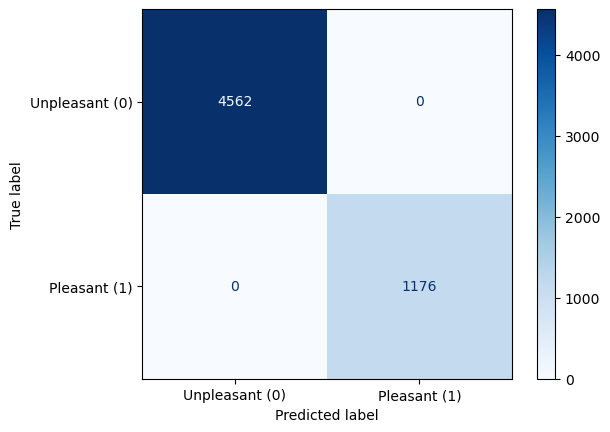

In [124]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

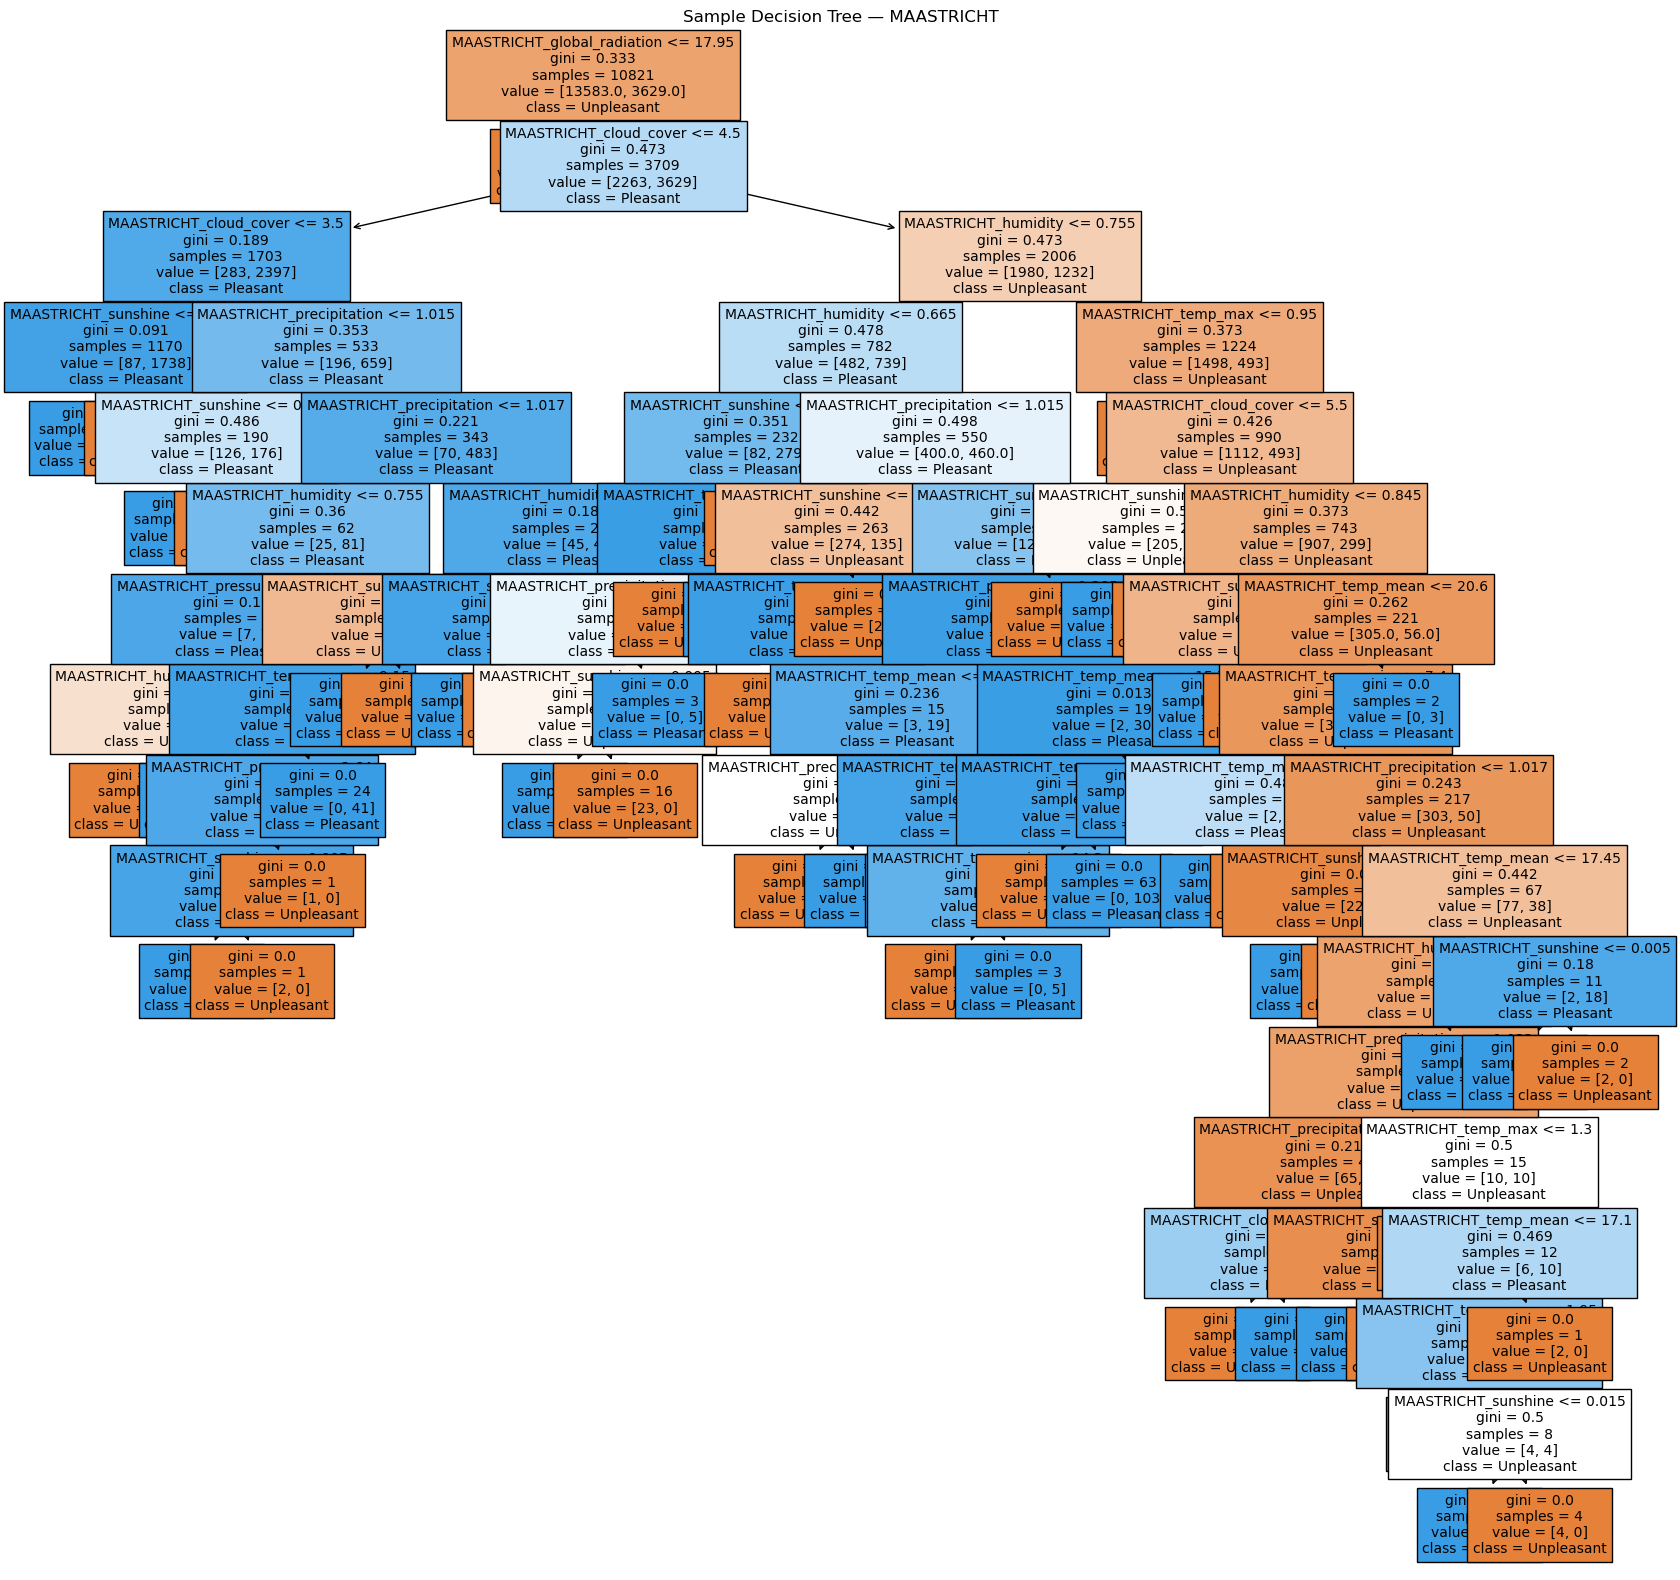

In [126]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

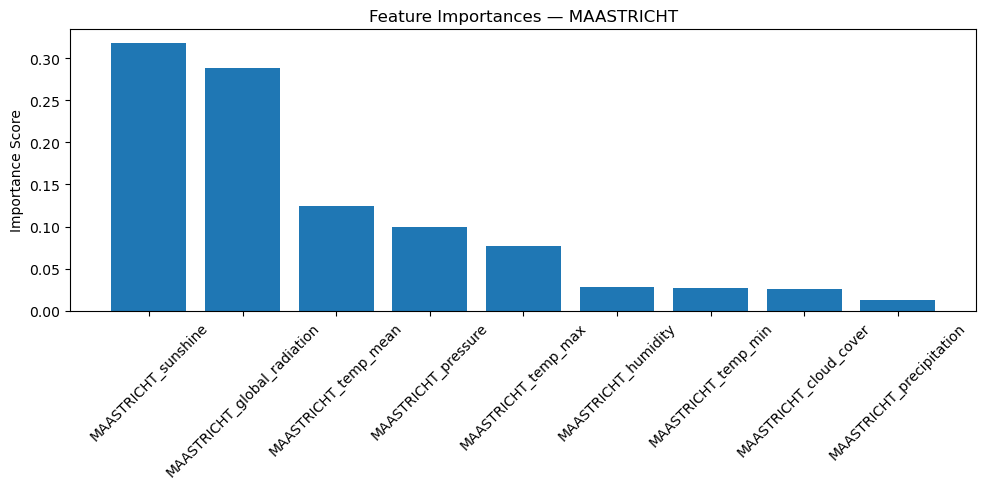

In [128]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 08. Madrid weather station: repeat sequence

In [132]:
# Extract relevant features and target for a single station
station = 'MADRID'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [134]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [138]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [140]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
# Predict
y_pred = clf.predict(X_test)

In [144]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for MADRID
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


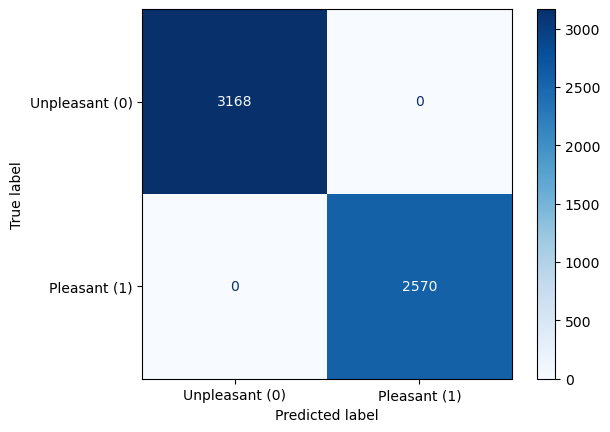

In [146]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

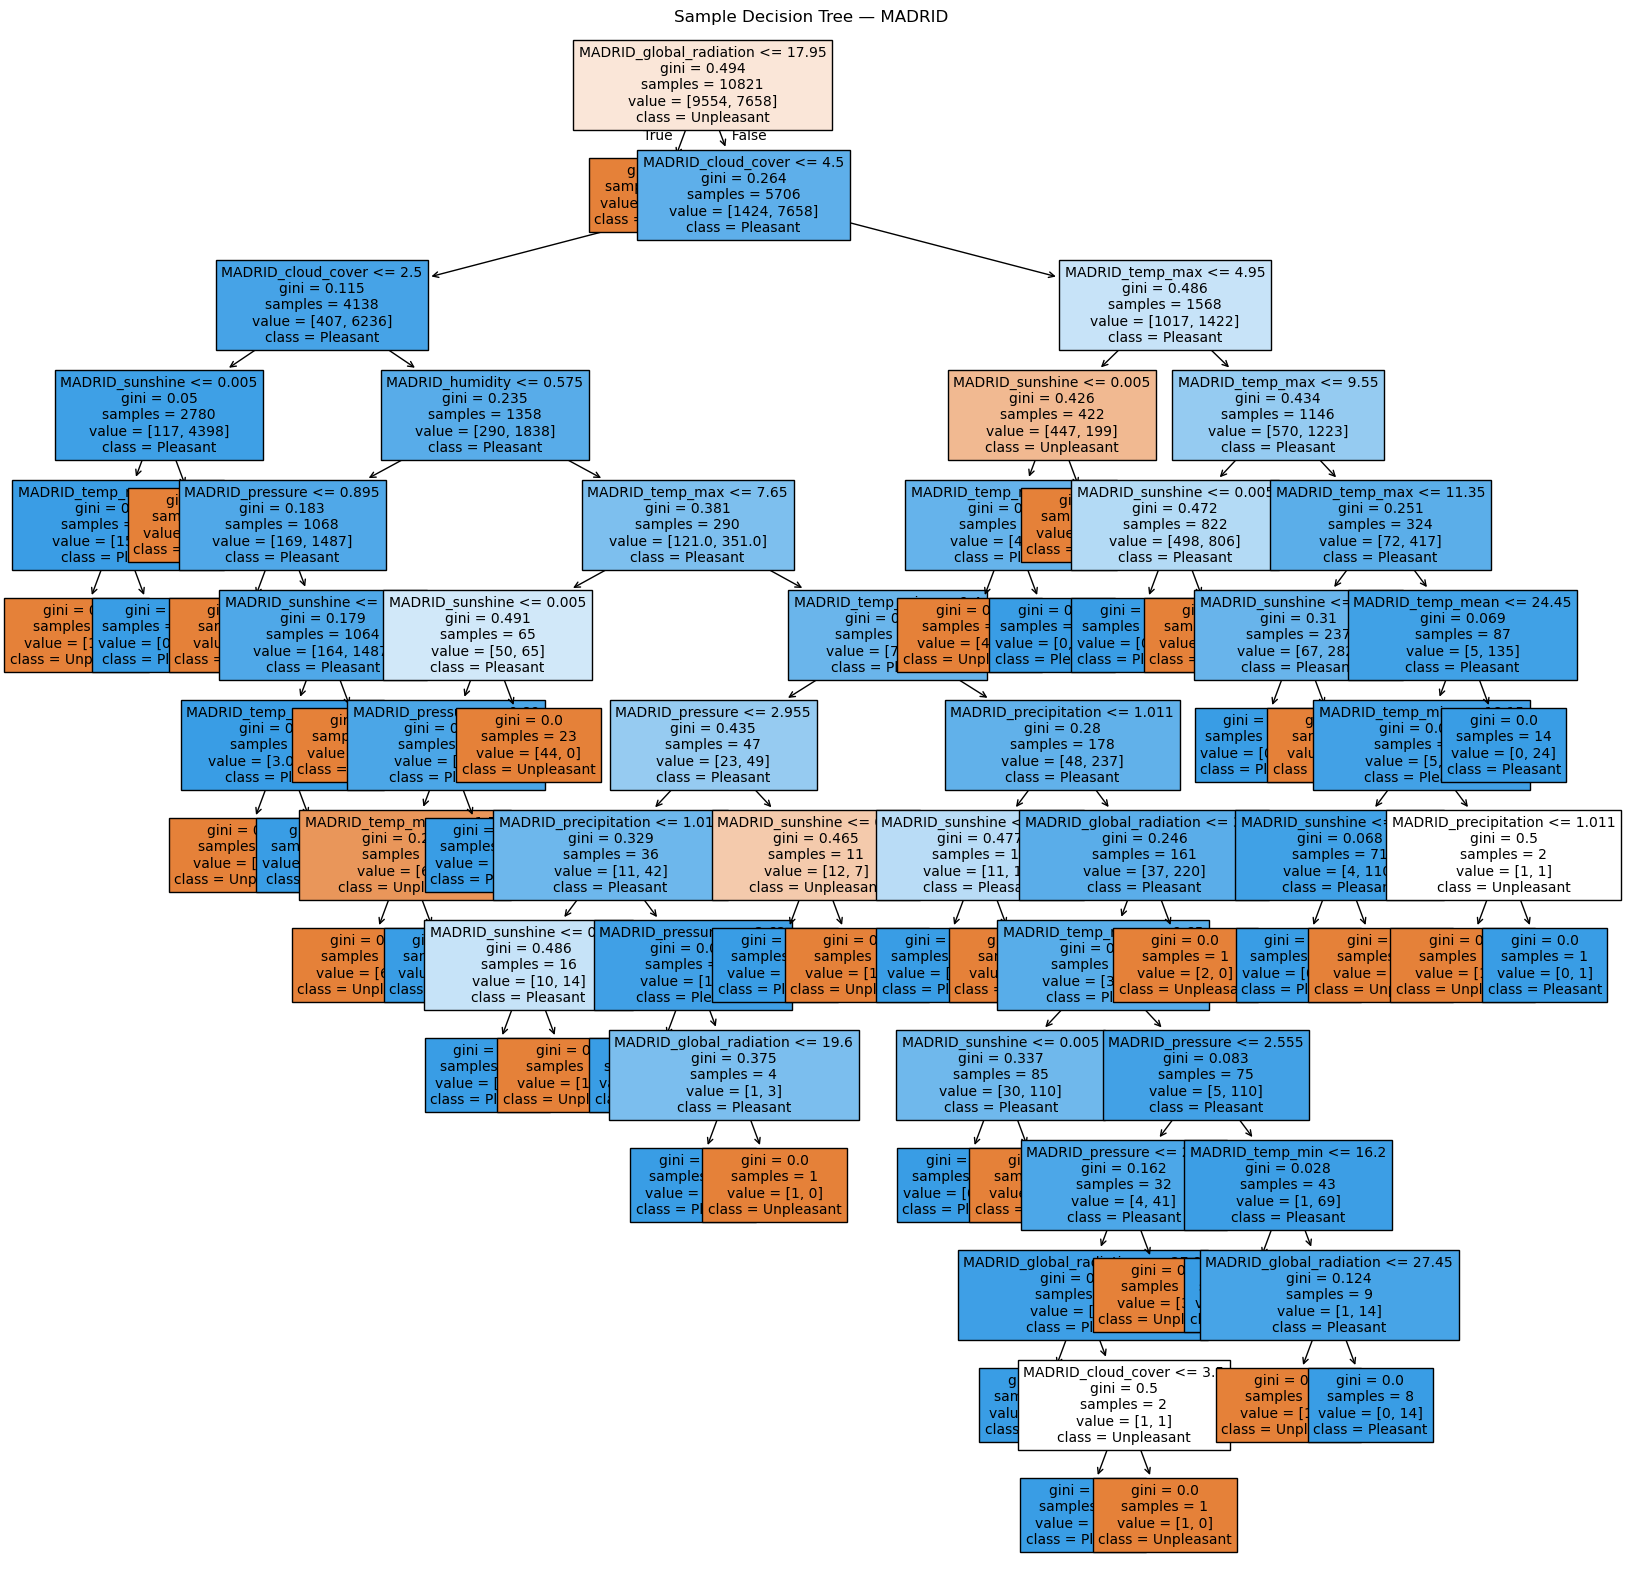

In [148]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

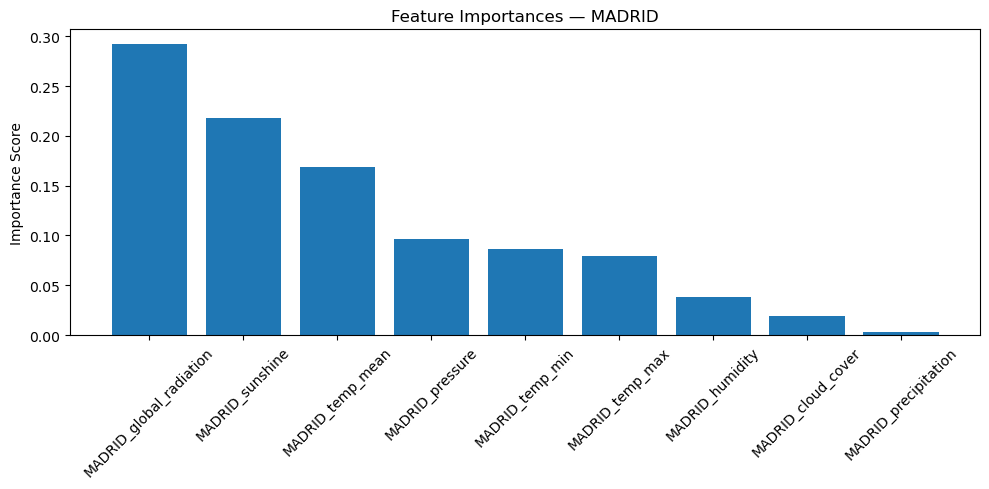

In [150]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 09. Heathrow weather station: repeat sequence

In [154]:
# Extract relevant features and target for a single station
station = 'HEATHROW'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [156]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [162]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [164]:
# Predict
y_pred = clf.predict(X_test)

In [166]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for HEATHROW
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


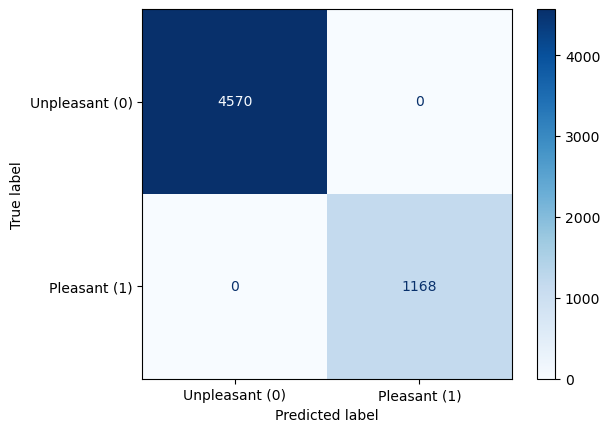

In [168]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

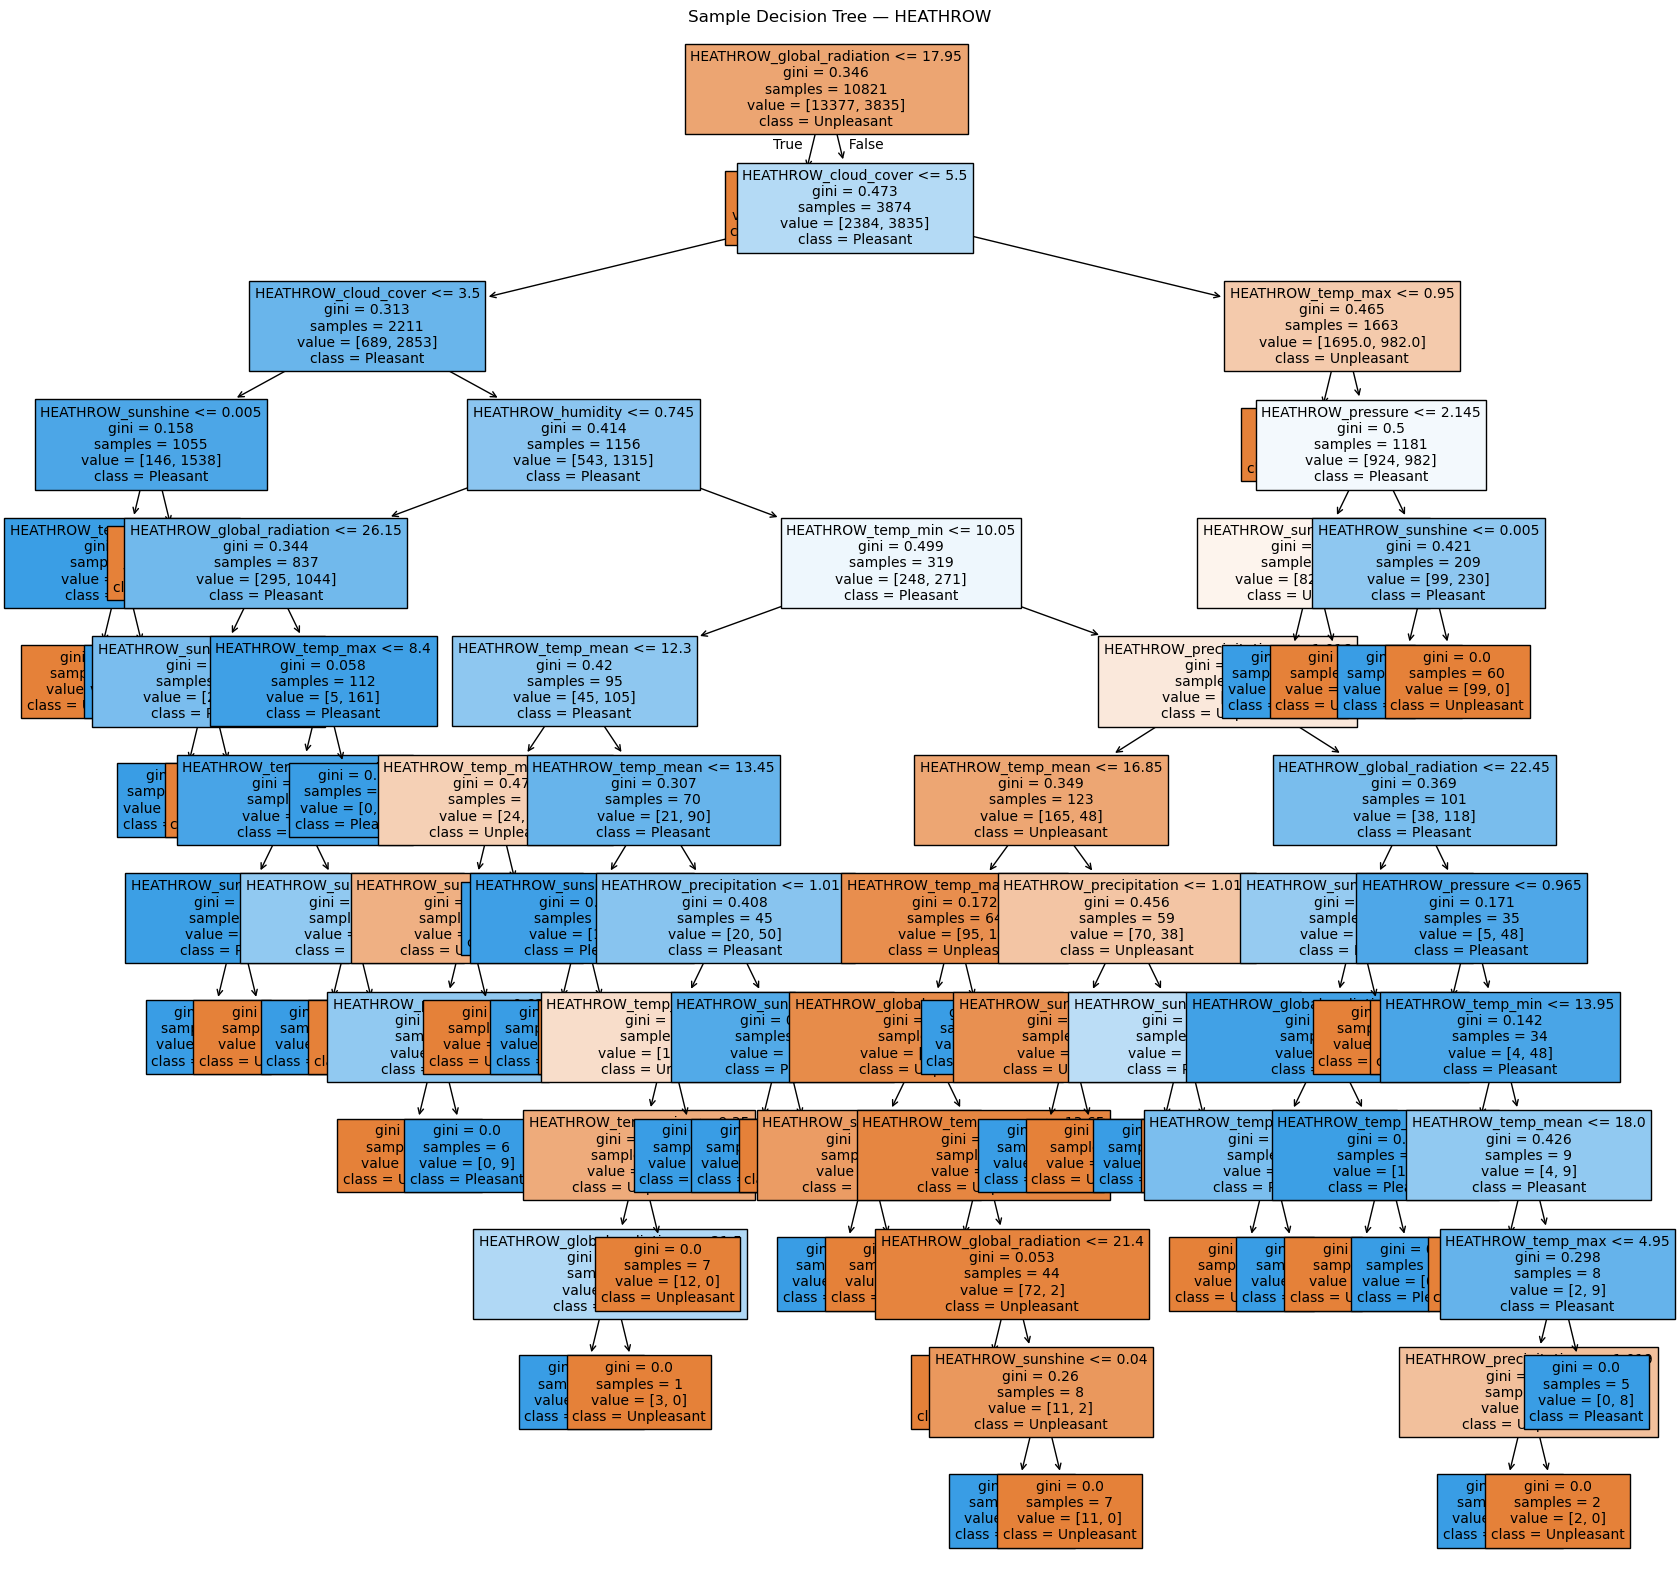

In [170]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

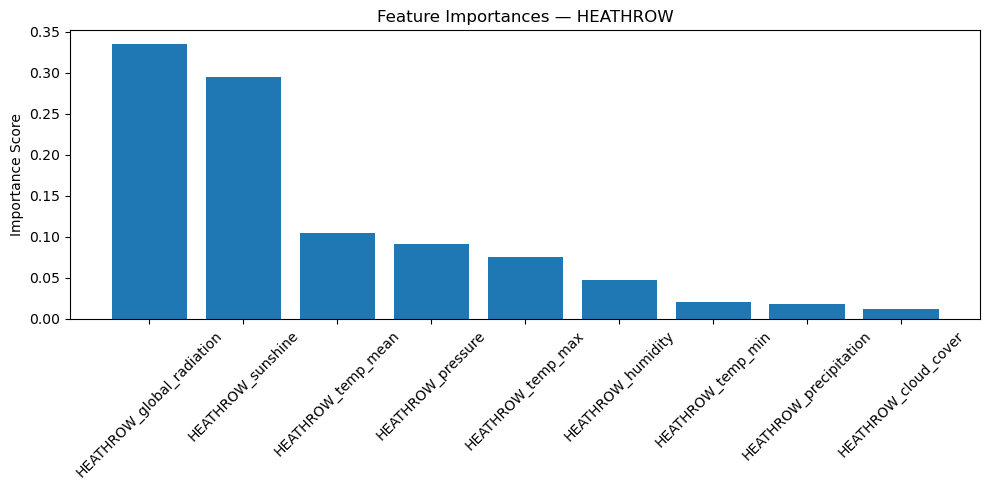

In [172]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 10. Stockholm weather station: repeat sequence

In [174]:
# Extract relevant features and target for a single station
station = 'STOCKHOLM'  # Change this to HEATHROW, STOCKHOLM, etc.

X = df_unscaled[[col for col in df_unscaled.columns if col.startswith(station)]].to_numpy()
y = pleas_ans[f'{station}_pleasant_weather'].to_numpy()

In [176]:
# Check the dimensions
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [180]:
# Check the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [182]:
# Select 100 decision trees for the n_estimators argument, for a thorough run

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [184]:
# Predict
y_pred = clf.predict(X_test)

In [186]:
print(f"\n📊 Random Forest Results for {station}")
print("Accuracy (Test):", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred) * 100, 2), "%")
print("F1 Score (weighted):", round(f1_score(y_test, y_pred, average='weighted') * 100, 2))
print("Recall (Test):", round(recall_score(y_test, y_pred) * 100, 2))
print("Precision (Test):", round(precision_score(y_test, y_pred) * 100, 2))


📊 Random Forest Results for STOCKHOLM
Accuracy (Test): 100.0 %
Balanced Accuracy: 100.0 %
F1 Score (weighted): 100.0
Recall (Test): 100.0
Precision (Test): 100.0


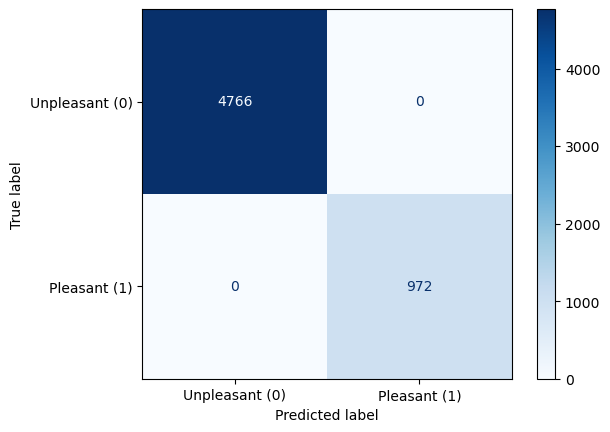

In [188]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Unpleasant (0)', 'Pleasant (1)']).plot(cmap="Blues")

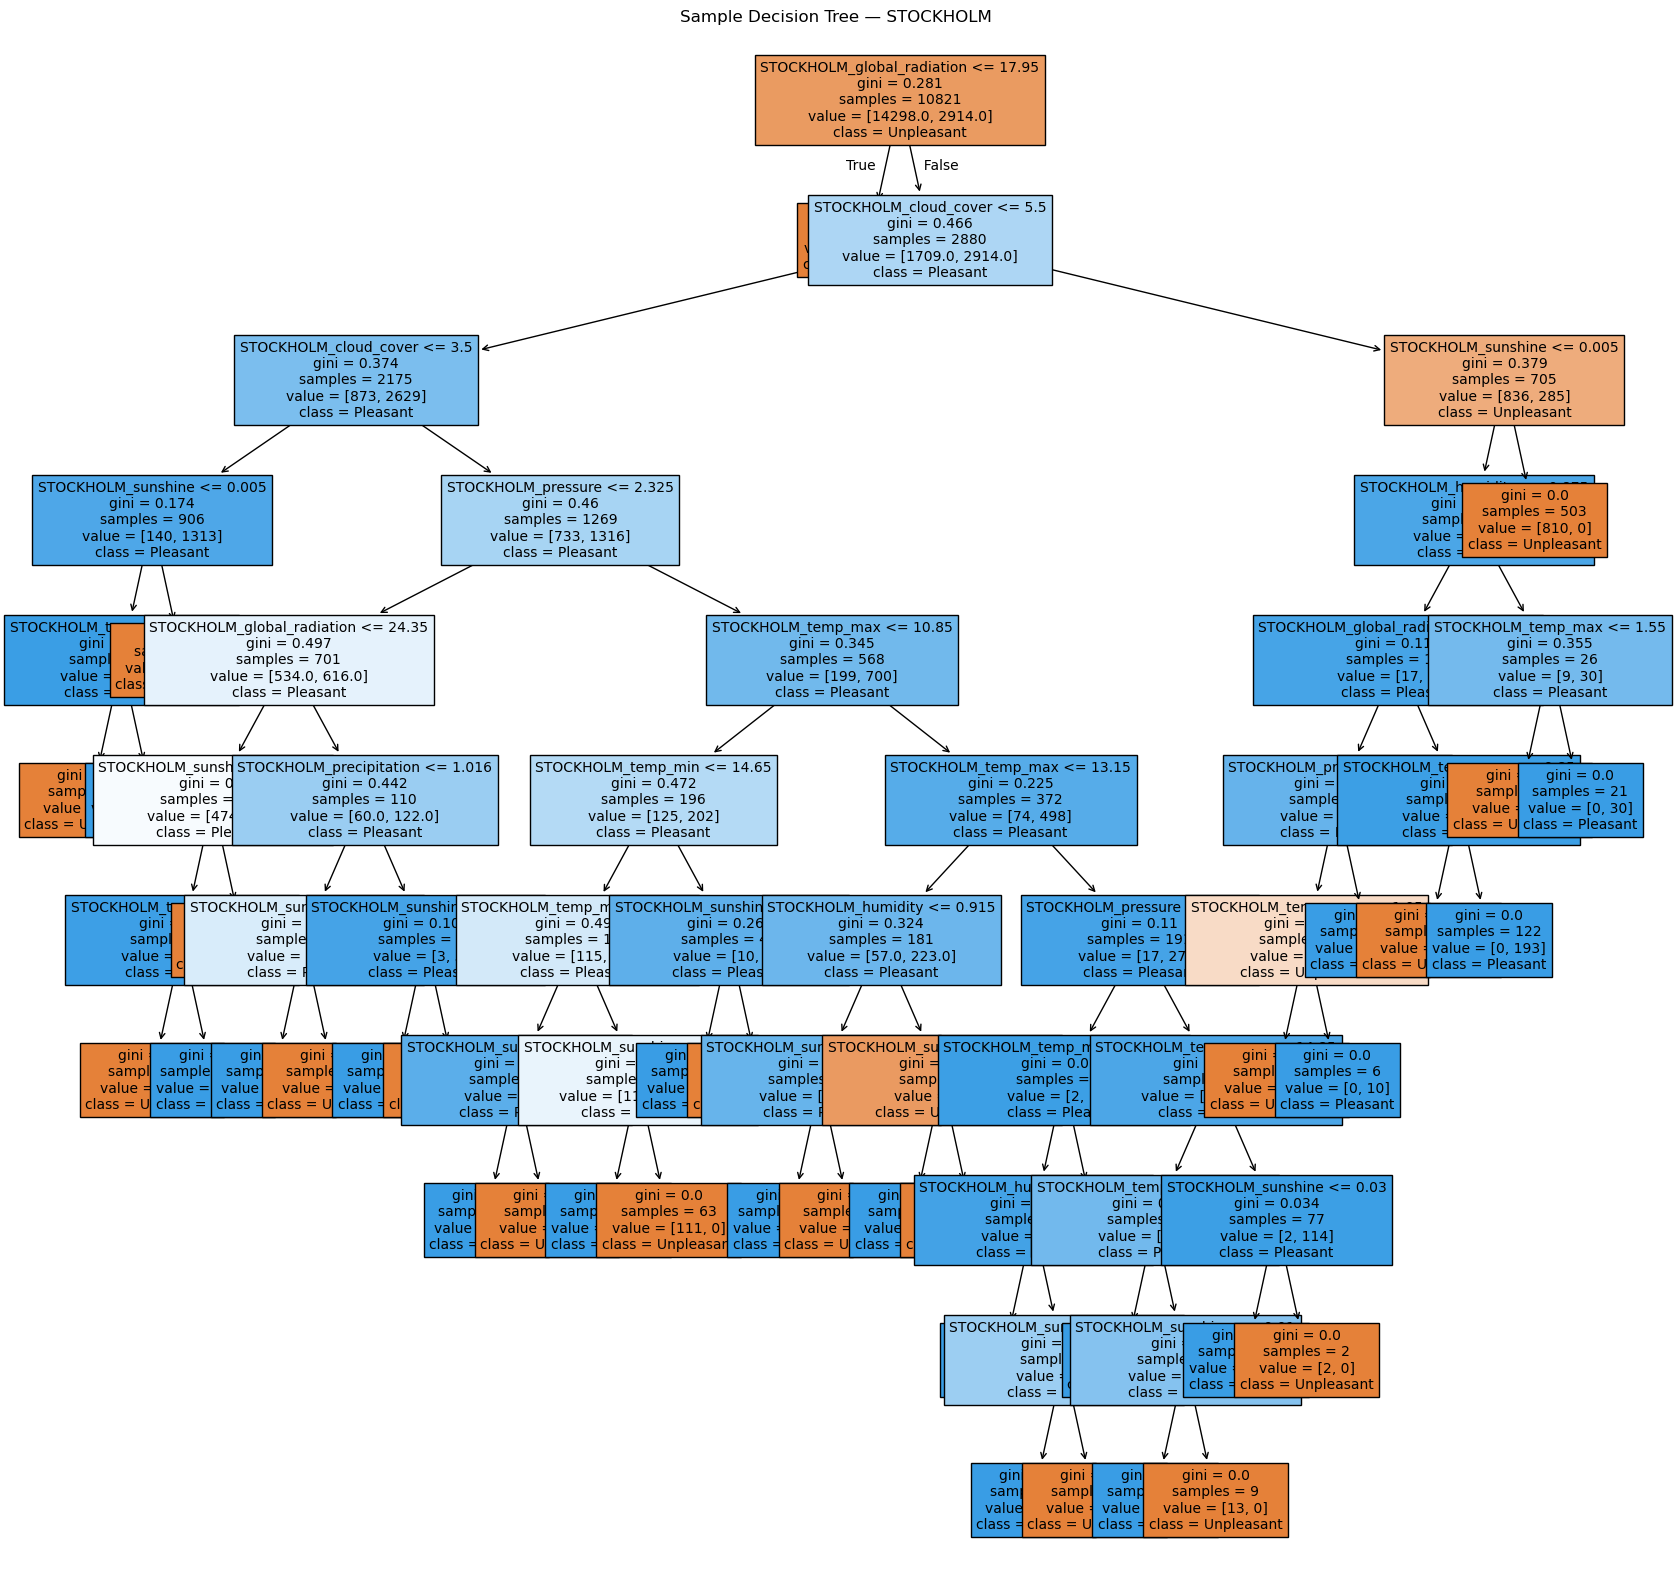

In [190]:
# The number 88 is lucky to some cultures, so that particular decision tree plot is selected

fig = plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[88], 
          filled=True, 
          fontsize=10,
          feature_names=[f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']],
          class_names=['Unpleasant', 'Pleasant']);
plt.title(f"Sample Decision Tree — {station}")
plt.show()

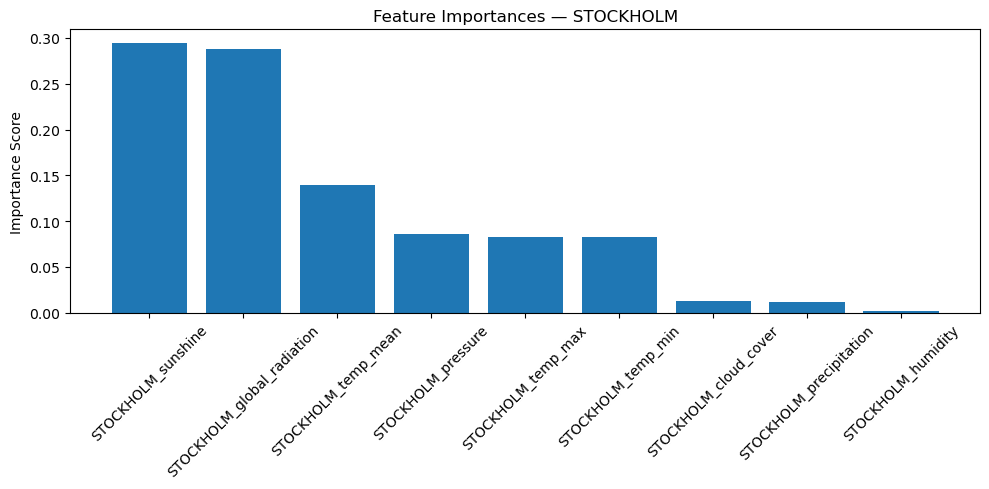

In [192]:
importances = clf.feature_importances_
feature_names = [f"{station}_{feat}" for feat in ['cloud_cover', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'global_radiation']]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(feat_imp.index, feat_imp.values)
plt.title(f"Feature Importances — {station}")
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

### 11. Summary and interpretation

In [199]:
# Import results summary table created in Excel, without the index column
summary = pd.read_excel(os.path.join(path, 'Task 2.3 Summary - RF model 6-station results.xlsx'), index_col=None)

In [201]:
summary

Weather Station Model Overall Accuracy Balanced Accuracy  \
0        Belgrade    RF             100%              100%   
1          Debilt    RF             100%              100%   
2        Heathrow    RF             100%              100%   
3      Maastricht    RF             100%              100%   
4          Madrid    RF             100%              100%   
5       Stockholm    RF             100%              100%   

  F1 Score (Weighted) Recall (Pleasant) Precision (Pleasant)  \
0                100%              100%                 100%   
1                100%              100%                 100%   
2                100%              100%                 100%   
3                100%              100%                 100%   
4                100%              100%                 100%   
5                100%              100%                 100%   

         Imp Rank 1        Imp Rank 2 Imp Rank 3 Imp Rank 4 Imp Rank 5  
0          sunshine  global_radiation  temp_mean   temp_max   pressure  
1          sunshine  global_radiation  temp_mean   pressure   temp_max  
2  global_radiation          sunshine  temp_mean   pressure   temp_max  
3          sunshine  global_radiation  temp_mean   pressure   temp_max  
4  global_radiation          sunshine  temp_mean   pressure   temp_min  
5          sunshine  global_radiation  temp_mean   pressure   temp_max

#### Interpretation

#### Based on perfect results across the 5 metrics evaluated (table above) at 6 different weather stations, everything now "makes sense" about the mysterious, undisclosed provenance of the "Black Box" Pleasant weather answers dataset, which we were tasked with predicting in various Tasks using the KNN, DT, ANN, LSTM, CNN and RF models.

#### The Pleasant weather answers dataset was mostly likely created with a set of *deterministic thresholds* (fixed, simple rules) for each weather station.  An example of this might be IF mean temperature > 20 degrees Celsius AND sunshine > (threshold value) AND global radiation > (threshold # 2 value), THEN label = Pleasant ELSE Label = Unpleasant.

#### Why so?  Because Random Forests (RF) models and Gradient Boosting Machines (i.e. XGBoost) excel at reverse-engineering deterministic rules-based labels, and working with tabular (row-and-column) data.  The RF model's perfect performance for 6 different European weather stations suggests it reverse-engineered beautifully the rules and thresholds used to create the labels.  Other models, especially the neural network types, excel at other tasks (unstructured data like images, audio and text) based on how they learn, but not at reverse-engineering deterministic rules.

#### The RF model is the "best tool" for this particular job (binary classification prediction exercise for daily Pleasant/Unpleasant weather outcomes).  The more complex Deep Learning (DL) models are not always superior.  It depends on the task, dataset(s) and other factors.

#### The feature importances rankings per station (see table above), where the top 4 or 5 ranked features had cumulative summed importances > 0.80, simply tell us which variables were most useful to the 100 decision trees (in each station's fitted RFs) for reverse-engineering the deterministic rules-based label thresholds.  Sunshine, global radiation and mean temperature where Top 3 at all 6 stations, with pressure as #4 (mostly, one exception), then maximum temperature at #5 (mostly, two exceptions).

#### The RF model did not learn "weather patterns" in the data, which other models (i.e. LSTM) can do well, especially for non-linear time series data.

#### The results from this Task do NOT reveal which features (indicators) might be more important in terms of predicting future weather events -- unless the goal is simply another binary Pleasant/Unpleasant daily weather prediction exercise on a new Test dataset.  The results obtained in Task 2.3 do not help us predict extreme weather events such as droughts or floods, which would have multiple dimensions to labels, because as discussed the RF model did not learn weather patterns from the dataset.

#### My view is that within the limited range of models examined so far, the LSTM model can learn weather patterns from time series data, for the goal of predicting future extreme weather events.  Weather feature interactions are complex, the data is non-linear and highly autocorrelated for many features, all of which LSTM handles well.

#### Tasks 2.1 - 2.3 so far have revealed the following: (1) Model selection matters; (2) data selection (including, scaled vs unscaled) matters; and (3) feature selection absolutely matters.